# Curva de Bombeamento

In [38]:
#Importando bibliotecas:
import numpy as np
import matplotlib.pyplot as plt

#Exibição dos gráficos em no notebook:
#%matplotlib inline


#Exibição dos gráficos em janela externa:
%matplotlib qt
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20


ImportError: Failed to import any qt binding

* Curva do fabricante:

In [35]:
#Pontos obtidos do gráfico do fabricante:
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
y0 = [60, 58, 57, 56, 50, 54, 52, 48, 45, 40]

#Interpolação Polinomial 
z = np.polyfit(x, y0, 2)
y1 = np.poly1d(z)

* Curva do sistema:

In [36]:
def hman(Q):
    #Conversão para SI:
    Q = Q/3600

    #diametros:
    ds = 62.71/1000
    dr = 52.51/1000

    #velocidades:
    As = ((np.pi*(ds**2))/4)
    Ar = ((np.pi*(dr**2))/4)
    vs = Q/As
    vr = Q/Ar

    #Perdas na sucção:
    ls = 4.2
    hlts = 0.0252*(ls/ds)*((vs**2)/(2*9.81))
    hlks = 3.1*((vs**2)/(2*9.81))

    #Perdas no recalque:
    lr = 70.3
    hltr = 0.0256*(lr/dr)*((vr**2)/(2*9.81))
    hlkr = 6.1*((vr**2)/(2*9.81))

    #Perdas totais e altura manometrica:
    hs = 2.6
    hr = 46.2
    hls = hlts+hlks
    hlr = hltr+hlkr
    
    return (hs+hr+hls+hlr)

#Array do projeto:
y2 = []

for i in range(len(x)):
    y2.append(hman(x[i]))

* Gráfico:

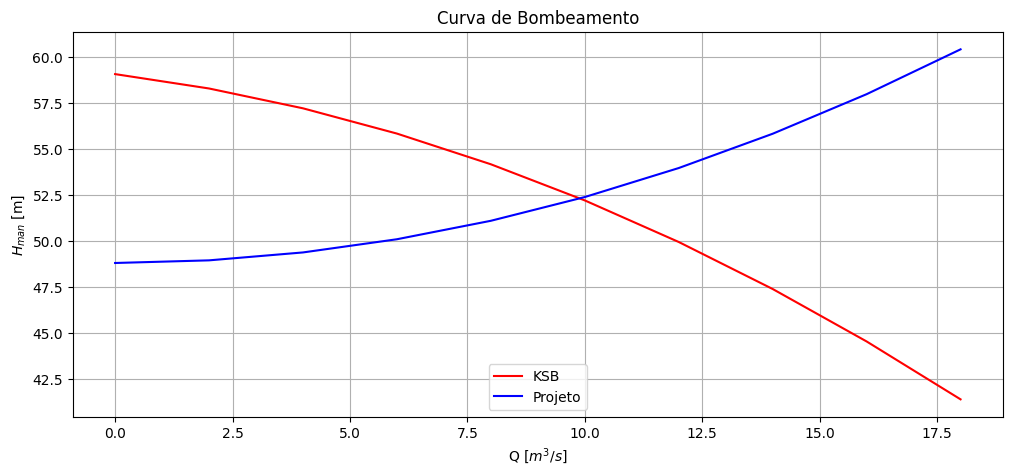

In [37]:
#Plot do gráfico:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(x, y1(x), 'red', label='KSB')
plt.plot(x, y2, 'blue', label='Projeto')
#plt.scatter()
plt.xlabel('Q [$m^3/s$]')
plt.ylabel('$H_{man}$ [m]')
plt.legend(loc='lower center')
plt.title('Curva de Bombeamento')
plt.grid()